# Case Study Breast Cancer
We will create a tutorial for the Nearest Neighbor algorithm, including k-Nearest Neighbors (KNN) and Radius Neighbors (RNN), using the Breast Cancer dataset. We will demonstrate how the choices of k and radius affect the classification results and compare the performance of different models. To aid understanding, we will visualize the prediction results.

## Setup
Import necessary libraries and load the Breast Cancer dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

## Split the dataset into training and testing sets.

In [2]:
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Create and train the k-Nearest Neighbors (KNN) model.

In [23]:
# Create a list of k values for KNN
k_values = [1, 5, 11, 15, 21]

# Train KNN models with different k values and store the results
knn_results = {}
for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    y_pred_knn = knn_model.predict(X_test)
    knn_results[k] = {
        'model': knn_model,
        'y_pred': y_pred_knn,
        'accuracy': accuracy_score(y_test, y_pred_knn)
    }


## Create and train the Radius Neighbors (RNN) model.

In [24]:
# Create a list of radius values for RNN
radius_values = [350, 400, 450, 500, 550, 600]

# Train RNN models with different radius values and store the results
rnn_results = {}
for radius in radius_values:
    rnn_model = RadiusNeighborsClassifier(radius=radius)
    rnn_model.fit(X_train, y_train)
    y_pred_rnn = rnn_model.predict(X_test)
    rnn_results[radius] = {
        'model': rnn_model,
        'y_pred': y_pred_rnn,
        'accuracy': accuracy_score(y_test, y_pred_rnn)
    }

## Compare the performance of KNN and RNN models.

In [25]:
# Print the accuracy of KNN models
print("KNN Accuracy:")
for k, result in knn_results.items():
    print(f"K = {k}: {result['accuracy']:.2f}")

# Print the accuracy of RNN models
print("\nRNN Accuracy:")
for radius, result in rnn_results.items():
    print(f"Radius = {radius}: {result['accuracy']:.2f}")


KNN Accuracy:
K = 1: 0.93
K = 5: 0.96
K = 11: 0.98
K = 15: 0.96
K = 21: 0.96

RNN Accuracy:
Radius = 350: 0.94
Radius = 400: 0.94
Radius = 450: 0.94
Radius = 500: 0.91
Radius = 550: 0.90
Radius = 600: 0.90


## Visualize the prediction results for KNN and RNN.

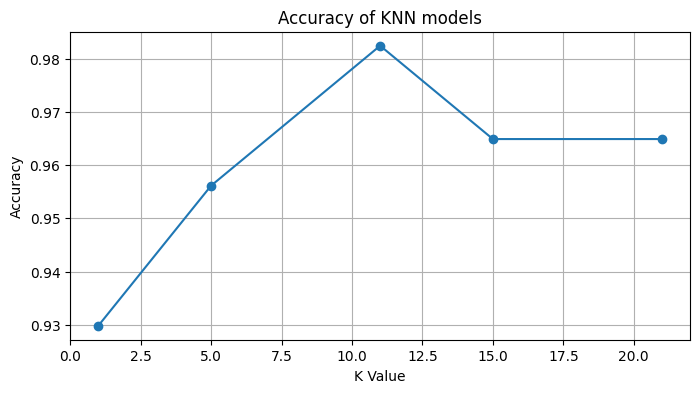

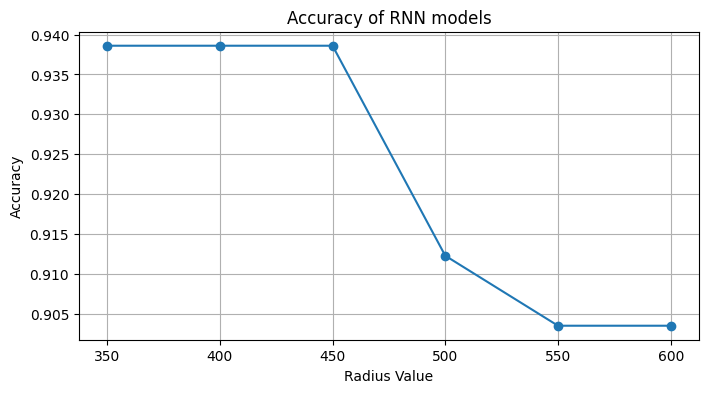

In [26]:
# Visualize the accuracy of KNN models
k_values = [k for k in knn_results.keys()]
k_accuracies = [result['accuracy'] for result in knn_results.values()]

plt.figure(figsize=(8, 4))
plt.plot(k_values, k_accuracies, marker='o')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('Accuracy of KNN models')
plt.grid(True)
plt.show()

# Visualize the accuracy of RNN models
radius_values = [radius for radius in rnn_results.keys()]
radius_accuracies = [result['accuracy'] for result in rnn_results.values()]

plt.figure(figsize=(8, 4))
plt.plot(radius_values, radius_accuracies, marker='o')
plt.xlabel('Radius Value')
plt.ylabel('Accuracy')
plt.title('Accuracy of RNN models')
plt.grid(True)
plt.show()


## K and R
Feel free to experiment with different values of k and radius to observe how they affect the accuracy of the models.